<a href="https://colab.research.google.com/github/jyothi8203/IIITH2024/blob/main/CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLIP: Learning Transferable Visual Models From Natural Language Supervision (International Conference on Machine Learning 2021)




*  CLIP jointly trains an image encoder and a text encoder to predict the correct pairings of a batch of (image, text) training
examples.
*   At test time the learned text encoder synthesizes a zero-shot linear classifier by embedding the names or descriptions of the
target dataset’s classes.
*   It was trained on 400M image-text pairs.






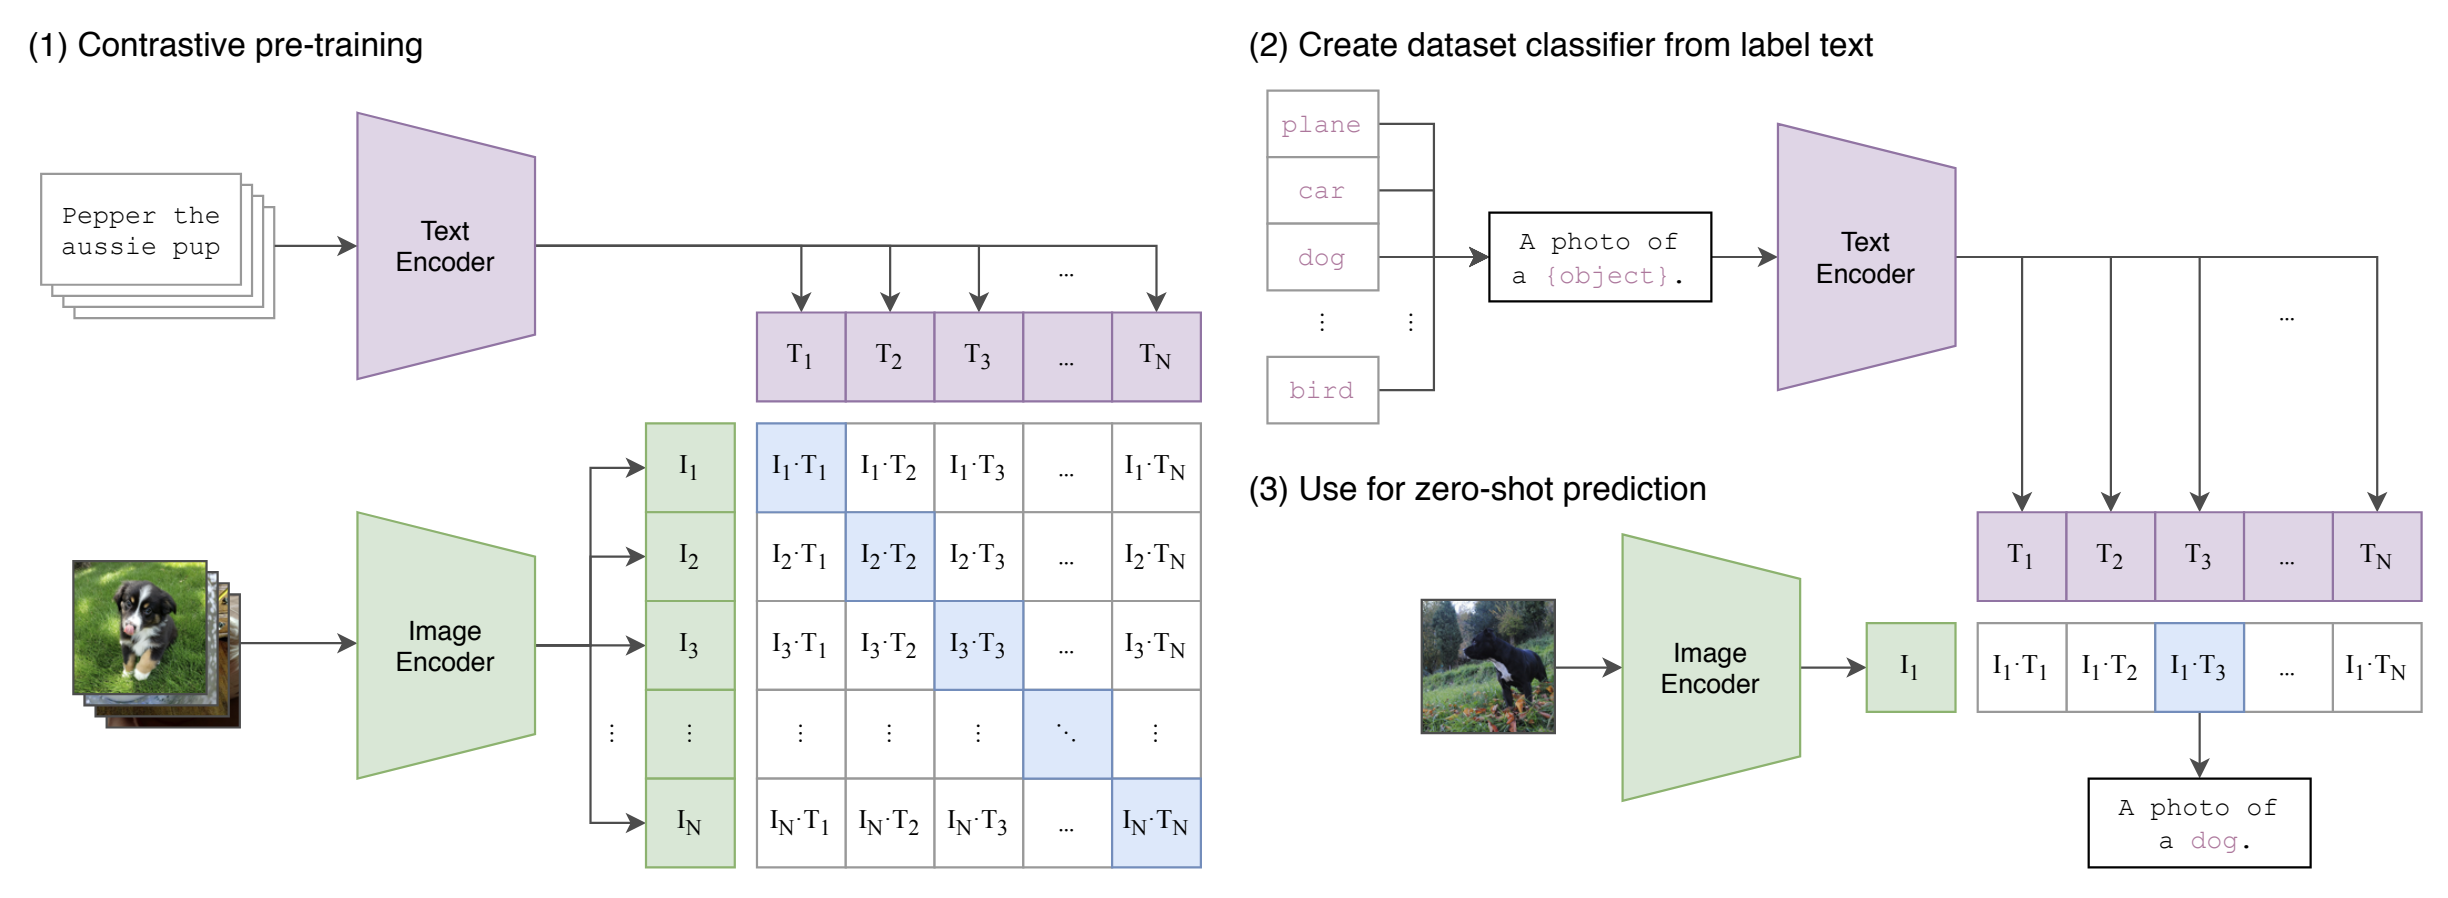

In [ ]:
!pip install transformers

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
model

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [ ]:
image = Image.open('/content/cat.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
texts = ["a photo of a dog", "a photo of a human", "a photo of an apple"]

In [ ]:
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

In [ ]:
for i in inputs.keys():
  print(i,inputs[i].shape)

input_ids torch.Size([3, 7])
attention_mask torch.Size([3, 7])
pixel_values torch.Size([1, 3, 224, 224])


In [ ]:
inputs['input_ids']

tensor([[49406,   320,  1125,   539,   320,  1929, 49407],
        [49406,   320,  1125,   539,   320,  2751, 49407],
        [49406,   320,  1125,   539,   550,  3055, 49407]])

In [ ]:
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

In [ ]:
outputs.logits_per_image

tensor([[21.9510, 20.9471, 19.5452]], grad_fn=<TBackward0>)

In [ ]:
print("Probabilities:", probs)

Probabilities: tensor([[0.6865, 0.2516, 0.0619]], grad_fn=<SoftmaxBackward0>)
